# Sobreviventes do Titanic


<h>O naufrágio do RMS Titanic é um dos mais infames naufrágios da história. Em 15 de abril de 1912, durante sua viagem inaugural, o Titanic afundou depois de colidir com um iceberg, matando 1502 de 2224 passageiros e tripulantes. Essa tragédia sensacional chocou a comunidade internacional e levou a melhores normas de segurança para os navios.<h/>
    

<h>Uma das razões pelas quais o naufrágio causou tamanha perda de vidas foi que não havia botes salva-vidas suficientes para os passageiros e a tripulação. Embora houvesse algum elemento de sorte envolvido na sobrevivência do naufrágio, alguns grupos de pessoas tinham maior probabilidade de sobreviver do que outros, como mulheres, crianças e a classe alta.<h/>

fonte: [kaggle.](https://www.kaggle.com/c/titanic)

## Descrição de dados:



1. Sobrevivência - Sobrevivência (0 = Não; 1 = Sim). Não incluído no arquivo test.csv.
2. Pclass - Classe de Passageiros (1 = 1º; 2 = 2º; 3º = 3º)
3. Nome - Nome
4. Sexo - Sexo
5. Idade - idade
5. Sibsp - Número de irmãos / cônjuges a bordo
6. Parch - Número de pais / filhos a bordo
7. Bilhete - Número do Bilhete
8. Tarifa - tarifa do passageiro
9. Cabine - Cabine
10. Embarked - Porto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton)

Arquivo csv baixado do [kaggle.](https://www.kaggle.com/c/titanic)

# Perguntas:

Realizei uma breve pesquisa sobre o naufragio do Titanic a procura de insights sobre o tema abortado.Em seguida iniciei minha análise de dados exploratória afim de identificar padrões, anomalias e realizei um Brainstorm para criar perguntas relevantes que pudessem ser respondidas pelo dataset em questão, por fim selecionei as perguntas abaixo:


1.  Qual a "classe" com o maior número de "sobreviventes"?


2.  Qual o porto de embarque com o maior número de sobreviventes?


3. Qual o porto de embarque com o maior taxa de mortalidade?


4.  Maior percentual de sobreviventes por sexo?


5.  Qual a maior taxa de mortalidade por taxa etária?


6. Qual taxa de Mortalidade por idade?   

# Limpeza dos Dados

In [1]:
#Importando bibliotecas.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import csv

In [2]:
# lendo os dados como uma lista
print("Lendo o documento...")
df = pd.read_csv("titanic-data-6.csv") 
print("Ok!")

df.head()# exibindo as 5 primeiras linhas

Lendo o documento...
Ok!


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# identificando o número de valores não-nulos em cada coluna.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


As colunas abaixo contem dados faltantes.

1. Age = ação: preencher com a idade média dos tripulantes.
2. Embarked,ação: preeencher com o valor mais comum entre os valores da coluna.
3. Cabin", analisar tratativas cabiveis.

In [4]:
#Número de linhas e colunas do dataframe
df.shape

(891, 12)

In [5]:
# número de valores únicos em cada coluna
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [6]:
# retorna os tipos de dados das colunas
df.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
#  retorna estatísticas descritivas para cada coluna de dados
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# retorna as últimas linhas do dataset
df.tail(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [9]:
# encontra a média da idade dos sobreviventes
df_mean_age = df['Age'].mean()
print(df_mean_age)

29.69911764705882


_idade média dos sobreviventes é 29 anos._

*Vou substituir os campos vazios da coluna "Age" pela idade média encontrada " 29" anos.*

In [10]:
#substituindo valor NaN (vazios) por 29 anos (idade média) dos sobreviventes.
df["Age"].fillna("29", inplace = True) 
  

In [11]:
# encontrar favor mais frequente na coluna "Embarked". Substituir o valor encontrado campos com vazios da coluna
df.mode()['Embarked'][0]

#Substituir o valor encontrado campos com vazios da coluna
df["Embarked"].fillna("S", inplace = True) 


*O valor mais frequente para a coluna "Embarked" foi "S" = Southampton.*

In [12]:
# analisando dataset com valores faltantes
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


*Decidi excluir a coluna "Cabin" por a contém apenas 23% da dados preenchidos.*

In [13]:
# excluindo coluna "Cabin" conforme mencionado acima.
df_treated=df.drop(['Cabin'], axis=1)

*A coluna "Cabin" foi excluida do data frame.*

In [14]:
#Agora o dataset "df_treated" não tem campos vazios conforme abaixo.
df_treated.isnull().sum() 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
#visualindo o parte do dataset com head.()
df_treated.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S


Qual a genero com maior numero entre os sobreviventes?


Identifique muitas passagens foram compradas em grupo, sendo assim acredito que seja correto dividir os valores da coluna *"Fare"* pelo número de passageiros*("PassengerId")* mesmo que este momento não seja relevante para mesu questionamentos.


In [16]:
# dividindo o valor do coluna "Fare" pela ("PassengerId").
price_list= df_treated['Fare'] / df_treated['PassengerId']



In [17]:
# adicionando nova coluna "Price" com a informação do valor unitário da passagem.
df_treated['Price'] = price_list
df_treated.head(1)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Price
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,S,7.25


In [18]:
# identificando o número de valores não-nulos em cada coluna.
df_treated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null object
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
Price          891 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [19]:
# Salvando arquivo com o campos dados limpos.
df_treated.to_csv('df_treated.csv', index=False)

In [20]:
# selecionando sobreviventes =="1" da coluna Pclass.
df_Survived = df_treated.query('Survived == 1')

In [21]:
#exibindo parte do dataset com head.()
df_Survived.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Price
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,35.641650
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,2.641667


In [22]:
# Número de sobrevientes por classe = 'Pclass" =(A,B,C)
df_Survived_class = df_Survived.Pclass.value_counts() 
df_Survived_class

1    136
3    119
2     87
Name: Pclass, dtype: int64

# Qual a "classe" com o maior número de "sobreviventes"?

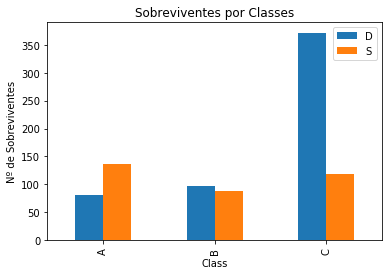

In [23]:
#Grafico com "número de sobrevientes por classe"
df_treated.groupby(['Pclass', 'Survived']).size().unstack().plot.bar()
objects = ('A','B','C')
y_pos = np.arange(len(objects))
plt.xticks(y_pos, objects)
plt.ylabel('Nº de Sobreviventes')
plt.legend('DS')
plt.title ("Sobreviventes por Classes")
plt.xlabel('Class');

<h3><p>Analisando o gráfico acima podemos constatar que a *Classe "A" teve o maior número, com exatamente 136 sobreviventes, diante esta constatação poderia ser levantadas algumas questões como por exemplo se houve algum tipo de suborno ou privilégio no salvamento das vítimas ou o fato da "classe A" ter o maior número de sobreviventes foi mero acaso.</p></h3>


In [24]:
# Sobriventes por local de embarque.
df_Survived_Embarked = df_Survived.Embarked.value_counts()  
df_Survived_Embarked

S    219
C     93
Q     30
Name: Embarked, dtype: int64

In [25]:
# Passageiros por porto de embarque e Sobrevivente por porto de embarque.
df_emb_surv = df_treated.groupby(['Embarked','Survived'],as_index=False)[['Embarked','Survived']]
df_emb_surv.size()
#Passageiros por porto de embarque.

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           219
dtype: int64

# Qual o porto de embarque com o maior número de sobreviventes?

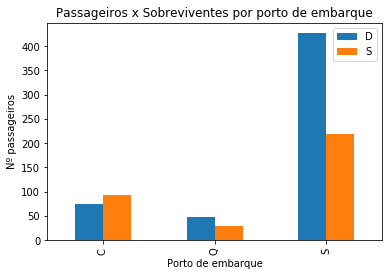

In [26]:
# gráfico 'Passageiros x Sobreviventes por porto de embarque.'


#legenda nome dos portos de embarque: C = Cherbourg; Q = Queenstown; S = Southampton)
df_treated.groupby(['Embarked', 'Survived']).size().unstack().plot.bar()
objects = ('C','Q','S')
y_pos = np.arange(len(objects))
plt.xticks(y_pos, objects)
plt.ylabel('Nº passageiros')
plt.legend('DS')
plt.title ("Passageiros x Sobreviventes por porto de embarque")
plt.xlabel('Porto de embarque');

<h3>Conforme o Gráfico acima o porto com o maior número de sobreviventes foi o de Southampton = S com 219 sobreviventes, este mesmo porto teve o maior número de passageiros o que facilitaria tal conclução.<h3/>

# Qual o porto de embarque com o maior taxa de mortalidade?

In [27]:
# percentual de mortalidade por porto de embarque

Surv_sub_S=(df_embarkerd_S) - (Survived_embarkerd_S.Survived)
Surv_dev_S = Surv_sub_S/df_embarkerd_S
Surv_pecent_S = round(Surv_dev_S,2)*100

Surv_sub_C=(df_embarkerd_C) - (Survived_embarkerd_C.Survived)
Surv_dev_C = Surv_sub_C/df_embarkerd_C
Surv_pecent_C = round(Surv_dev_C,2)*100

Surv_sub_Q=(df_embarkerd_Q) - (Survived_embarkerd_Q.Survived)
Surv_dev_Q = Surv_sub_Q/df_embarkerd_Q
Surv_pecent_Q = round(Surv_dev_Q,2)*100



#Gráfico % de Mortalidade por porto de embarque

fig, ax =plt.subplots()
ax.set_label = ('Southampton','Cherbourg','Queenstown')
plt_South =ax.bar(0,Surv_pecent_S,color='SkyBlue',label='Southampton')
plt_Cher =ax.bar(2,Surv_pecent_C,color='Indianred',label='Cherbourg')
plt_Queens =ax.bar(1,Surv_pecent_Q,color='yellow',label='Queenstown')
ax.set_title ("% de Mortalidade por porto de embarque")
ax.set_ylabel('Nº de Mortalidade')
ax.set_xlabel('Porto de Embarque')
y_pos = np.arange(len(objects))
plt.xticks(y_pos,label)
plt.legend()
plt.show()



NameError: name 'df_embarkerd_S' is not defined

<h3>Porto de embarque com o maior percentual de mortalidade também foi Southampton com 66%. <h3/>


# Maior percentual de sobreviventes por sexo?

In [ ]:
# % de sobreviventes por sexo.

Survived_Sex_M = df_treated.query('Sex =="male" and Survived == 1').count()
Survived_Sex_F = df_treated.query('Sex =="female" and Survived == 1').count()


# Gráfico de pizza, onde as fatias serão ordenadas e plotadas no sentido anti-horário:
labels = 'Male', 'Female'
sizes = [109, 233] # nº de sobreviventes homens e mulheres. 
explode = (0, 0.1)  # explodir apenas a segunda fatia (ex. "male").
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  #  "Equal" garante que a pizza dseja desenha como um circulo.
ax1.set_title("% de sobreviventes por sexo")

plt.show()

# Imprimir número de sobreviventes por sexo.

print('Nº de sobreviventes:')
print('{0} homens'.format(Survived_Sex_M['Survived']))
print('{0} mulheres'.format(Survived_Sex_F['Survived']))

#maior taxa de sobrevivência homens X mulheres

df_total_S=Survived_Sex_M['Survived']+Survived_Sex_F['Survived'] # somando nº de sobreviventes homens + mulheres
df_sub_sex= Survived_Sex_F['Survived']-Survived_Sex_M['Survived'] #subtraindo mulheres - homens.
df_most_gender_S=df_sub_sex/df_total_S # dividindo a diferênca entre o numero de homens - mulheres e dividindo pelo total de sobreviventes.
df_percent_sex=round(df_most_gender_S,2)*100 # gerando arredodamento para que o número fique mais apresentavel ao leitor.

print("Sobreviveram {0}% mais mulheres que homens.".format(df_percent_sex))


<h3>Sobreviveram 36% mais mulheres que homens, o que faz muito sentido, pois conforme convenção histórica mulheres e crianças devem ser os primeiros a serem salvos.<h3/>

In [ ]:
# modificando o tipo de dado de object para int da coluna "Age".
df_treated.Age=df_treated.Age.astype(int)

In [ ]:
# Sobreviventes por faixa etária

#parâmetros:

#Crianças: -1-14 anos 
#jovens:  15-24 anos 
#adultos: 25-54 anos
#idoso:  55-120 anos


#Rotulos para faixa etária

idade = [-1, 14, 24, 55, 120]
rotulo = ["Crianças","Jovens", "Adultos", "Idosos"]

age_column = df_treated.Age.astype(int) # modificando o tipo da variavel par inteiro.
age_column.dtypes

#vinculando o rotulo a idade = faixa etária

df_treated["faixa_etaria"] = pd.cut(x = age_column, bins = idade, labels = rotulo)
df_treated.faixa_etaria.head()

In [ ]:
# checando se existem campos faltantes.
df_treated.info()

# Qual a maior taxa de mortalidade por taxa etária?

In [ ]:
# Número de Sobreviventes e mortos por faixa etária.
df_treated.groupby(['faixa_etaria', 'Survived']).size()

In [ ]:
# Gráfico de Sobreviventes por faixa etária.

live_people = (45, 73, 212, 12)
death_people = (33, 127, 362, 27)

ind = np.arange(len(live_people))
width = 0.40
fig, ax = plt.subplots()

rects1 = ax.bar(ind - width/2, live_people, width,color='SkyBlue', label='Vivos')
rects2 = ax.bar(ind + width/2, death_people, width,color='IndianRed', label='Mortos')

ax.set_ylabel('Quantidade')
ax.set_title('Mortalidade por faixa etária')
ax.set_xticks(ind)
ax.set_xticklabels(('Criança', 'Jovens', 'Adulto', 'Idoso'))
ax.legend();

<h3>Analisando o gráfico acima "Sobreviventes por faixa etária" pude concluir que o maior percentual de mortalidade está no grupo dos "idosos" com 69% porem apenas 27 mortes; o grupo dos jovens com 64% e com 127 mortes; o grupo de adultos com 63% e com 362 mortos e o grupo das crianças com 42% e com 33 mortos.<h3/>

# Qual a taxa de Mortalidade por idade?

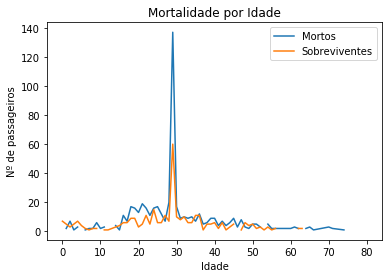

In [28]:
#convertendo o tipo da coluna "Age" para "int"
df_treated.Age=df_treated.Age.astype(int)
df_treated.dtypes

# Gráfico de mortalidade por idade.
df_treated.groupby(['Age', 'Survived']).size().unstack().plot.line()
plt.title("Mortalidade por Idade")
plt.legend(['Mortos','Sobreviventes'])
plt.xlabel('Idade')
plt.ylabel('Nº de passageiros');

<h3>Conforme gráfico acima a maior taxa de mortalidade entre os passageiros ficou por volta dos 30 anos de idade. </h3>

# Conclusões


<h3><p>O naufrágio do RMS Titanic foi um dos mais infames naufrágios da história, matando 1502 de 2224 passageiros e tripulantes<br/>
<p>Avaliando os dados fornecidos com 891 linhas e 12 colunas, iniciei a análise de dados exploratória afim de identificar padrões e anomalias.<br> 

<p>Todavia reenterro que as análises realizadas aqui têm caráter experimental, a massa de dados fornecida compromete a veracidade analises aqui realizadas, pois estava incompleta e algumas colunas com itens faltantes, já a coluna "Cabin" em particular estava apenas 23% da dados preenchidos. .</p>
<p>Para as colunas "Age" e "Embarked" com valores faltantes realizei o tratamento de input dos dados com base na média e no valor de maior frequência da coluna, já para a coluna "Cabin" optei por exclui-la seguindo as boas práticas.</p>
<br>
<p>Para tomar a decisão quanto a imputação ou exclusão dos dados temos que avaliar alguns fatores como por exemplo o motivo pelo qual o dado está ausente, tipo de negócio e a relevância das informações existentes na coluna ou linha com dados faltantes</p>
<br>
<br>
<br>

<h1>Questões Analisadas</h1>

<h3><p>1. Qual a "classe" com o maior número de "sobreviventes"?</h3></p>
<h3><p>R: Analisando o gráfico acima podemos constatar que a Classe "A" teve o maior número, com exatamente 136 sobreviventes, diante esta constatação poderia ser levantadas algumas questões como por exemplo se houve algum tipo de suborno ou privilégio no salvamento das vítimas ou o fato da "classe A" ter o maior número de sobreviventes foi mero acaso.</h3></p>


<h3><p>2. Qual o porto de embarque com o maior número de sobreviventes?</h3></p>
<h3><p>R: Conforme o Gráfico 'Passageiros x Sobreviventes' o porto com o maior número de sobreviventes foi o de Southampton = S com 219 sobreviventes, este mesmo porto teve o maior número de passageiros o que facilitaria tal conclusão.</h3></p>


<h3><p>3. Qual o porto de embarque com a maior taxa de mortalidade? </h3></p>
<h3><p>R: Porto de embarque com o maior percentual de mortalidade também foi Southampton com 66%. </h3></p>


<h3><p>4. Maior percentual de sobreviventes por sexo? </h3></p>
<h3><p>R: Sobreviveram 36% mais mulheres que homens, o que faz muito sentido, pois conforme convenção histórica mulheres e crianças devem ser os primeiros a serem salvos.</h3></p>

<h3><p>5. Qual a maior taxa de mortalidade por taxa etária?</h3></p>
<h3><p>Analisando o gráfico acima "Sobreviventes por faixa etária" pude concluir que o maior percentual de mortalidade está no grupo dos "idosos" com 69% porem apenas 27 mortes; o grupo dos jovens com 64% e com 127 mortes; o grupo de adultos com 63% e com 362 mortos e o grupo das crianças com 42% e com 33 mortos.</h3></p>

<h3><p>6. Qual a taxa de Mortalidade por idade? </h3></p>
<h3><p>R:A maior taxa de mortalidade entre os passageiros ficou por volta dos 30 anos de idade. <br>
Gráfico: "Mortalidade por Idade"</h3></p>


<h2>Referências<h2/>
    
[Matplotlib tutorial colors](https://matplotlib.org/users/colors.html)


[Reino Unido Distribuição da idade](https://www.indexmundi.com/pt/reino_unido/distribuicao_da_idade.html)

[Matplotlib legend tutorials](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html)

[Positive and Negative Correlation](https://www.emathzone.com/tutorials/basic-statistics/positive-and-negative-correlation.html)

[Titanic Facts](https://titanicfacts.net/titanic-survivors/)

[(Data Titanic Kaggle)](https://www.kaggle.com/c/titanic)

[Python | Pandas df.size, df.shape and df.ndim](https://www.geeksforgeeks.org/python-pandas-df-size-df-shape-and-df-ndim/)

[How to limit decimal numbers in Python?](https://pt.stackoverflow.com/questions/176243/como-limitar-n%C3%BAmeros-decimais-em-python)

[Por que mulheres e crianças têm prioridade em situações de emergência?](https://super.abril.com.br/mundo-estranho/por-que-mulheres-e-criancas-tem-prioridade-em-situacoes-de-emergencia/)

[cut() Method: Bin Values into Discrete Intervals](https://dfrieds.com/data-analysis/bin-values-python-pandas)

[Seaborn](http://seaborn.pydata.org/examples/index.html)